In [35]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [26]:
WILCOXON_RESULTS=dict()
for FILE in [F for F in os.listdir("./") if F.startswith("wilcoxon_results")]:
    F=open(FILE)
    for LINE in F:
        LINE=LINE.strip()
        if LINE.startswith(">"):
            ID=LINE.replace(">","")
            WILCOXON_RESULTS[ID]=dict()
        elif LINE.count("\t")==1:
            FEATURE, VALUES_STR = LINE.split("\t")
            VALUES = [float(V) for V in VALUES_STR.split(" ")]
            WILCOXON_RESULTS[ID][FEATURE]=VALUES    

In [27]:
IDS =  sorted(WILCOXON_RESULTS.keys())
FEATURES = sorted(WILCOXON_RESULTS[IDS[0]].keys())
len(IDS)

8

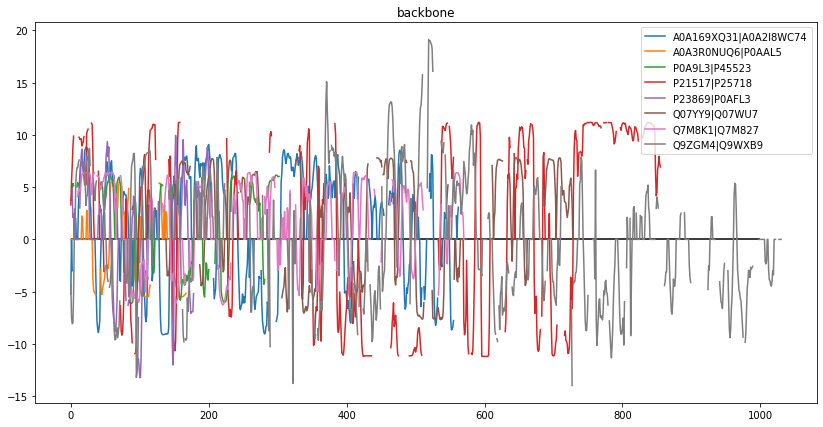

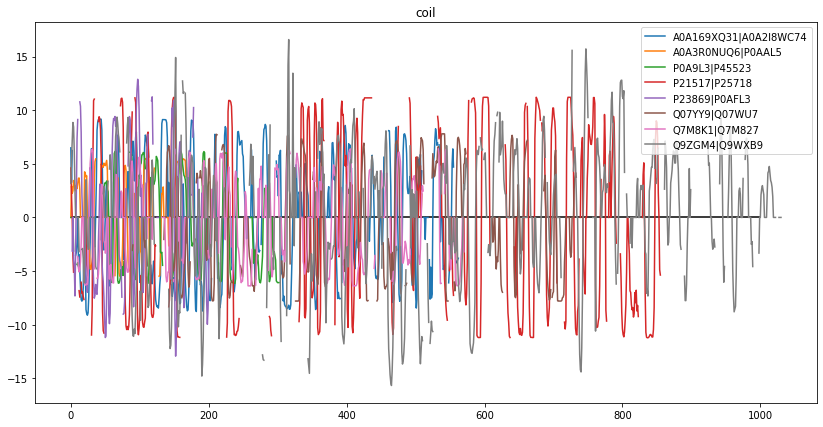

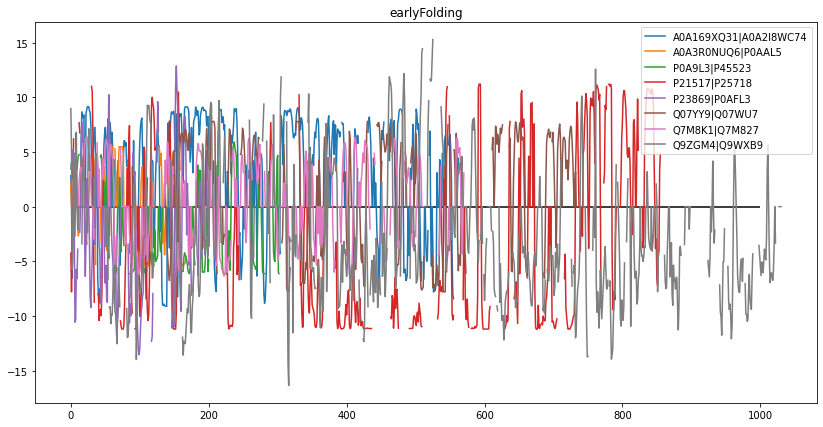

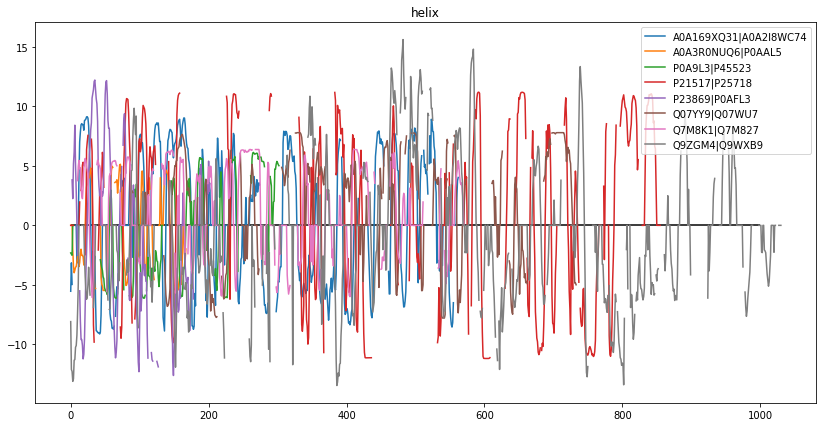

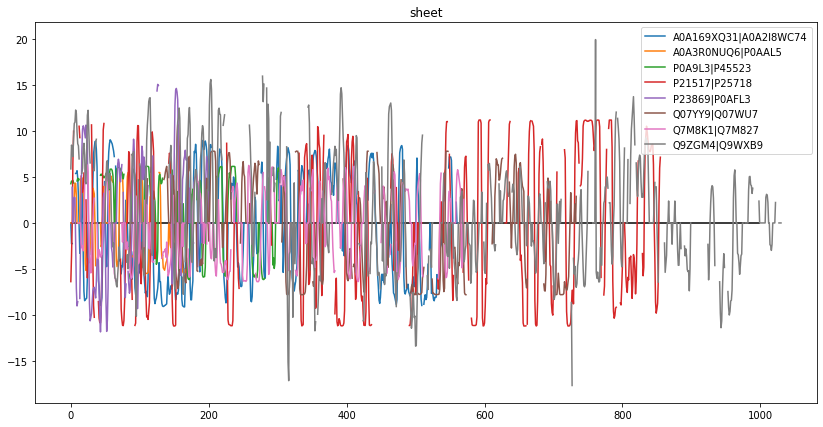

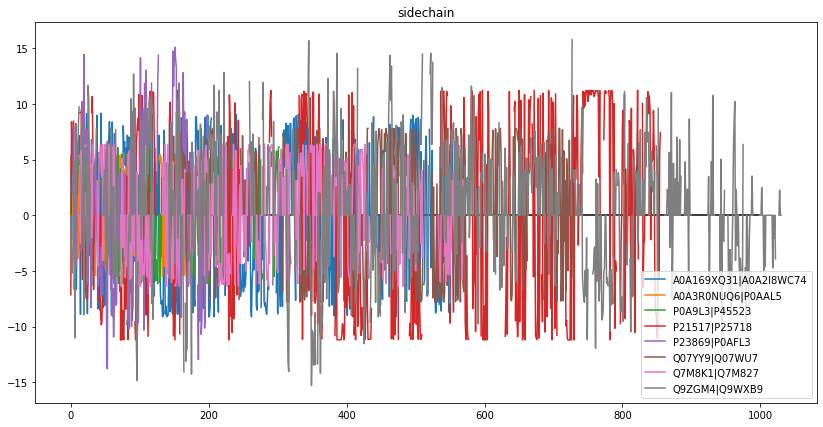

In [62]:
for FEATURE in FEATURES:
    plt.figure(figsize=(14,7))
    for ID in IDS: 
        VALUES=WILCOXON_RESULTS[ID][FEATURE]
        plt.plot(VALUES,label=ID)
    plt.hlines(0,0,1000)
    plt.title(FEATURE)
    plt.legend()
    plt.xlim()
    plt.show()

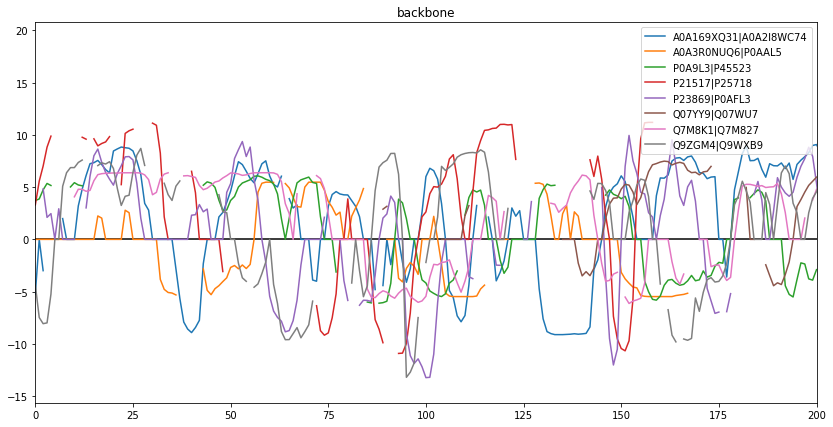

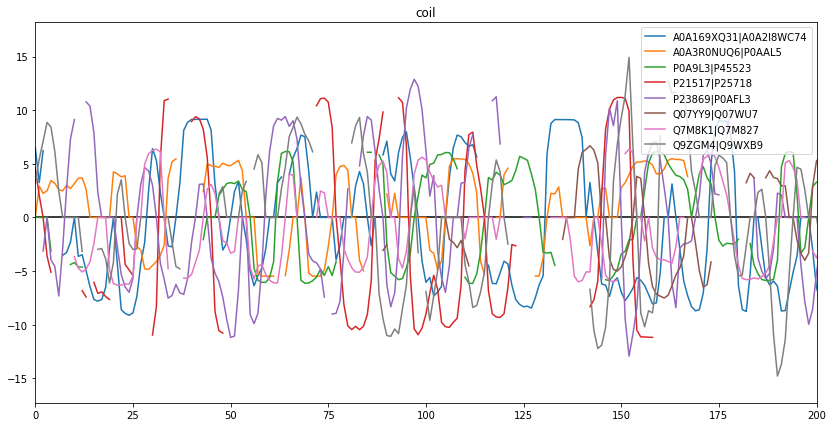

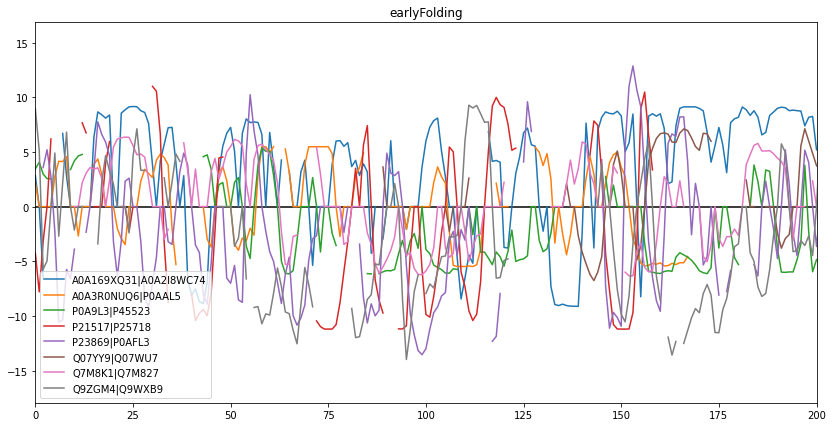

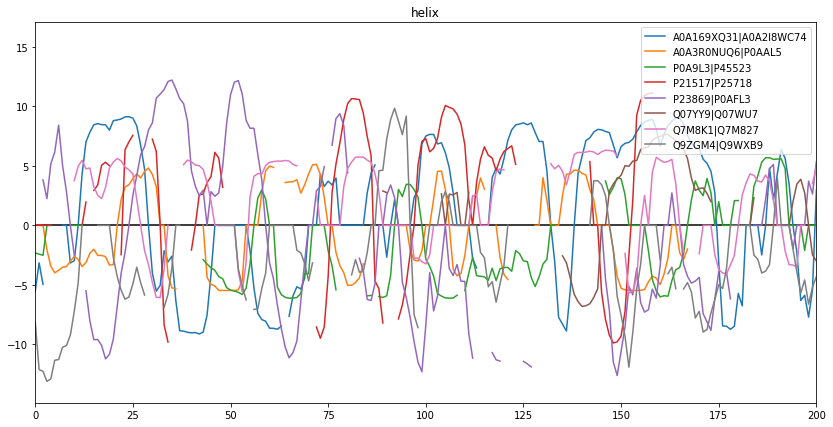

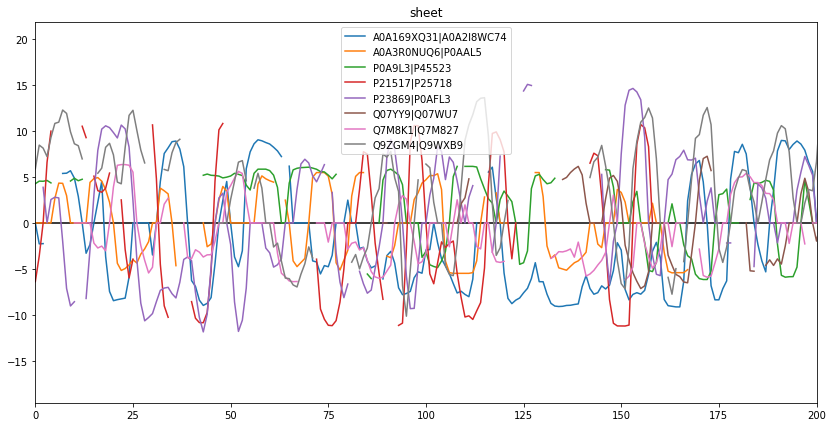

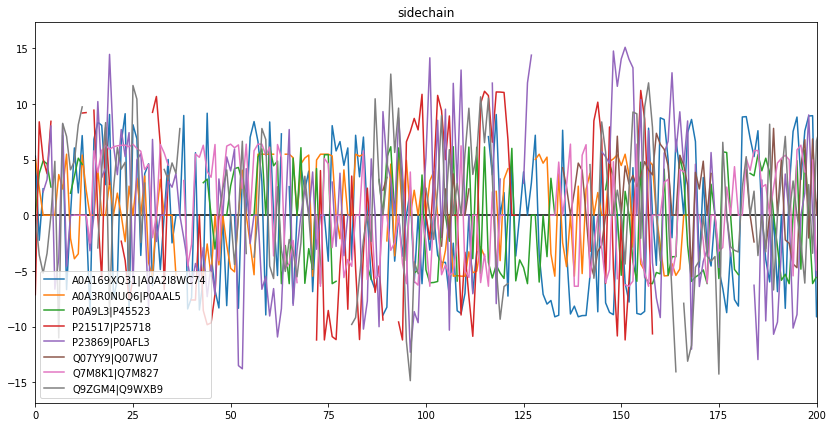

In [65]:
for FEATURE in FEATURES:
    plt.figure(figsize=(14,7))
    for ID in IDS: 
        VALUES=WILCOXON_RESULTS[ID][FEATURE]
        plt.plot(VALUES,label=ID)
    plt.hlines(0,0,1000)
    plt.title(FEATURE)
    plt.legend()
    plt.xlim((0,200))
    plt.show()

In [52]:
def getMedian(wilcoxonResults):
    arrays=dict()
    ids = sorted(wilcoxonResults.keys())
    features= sorted(wilcoxonResults[ids[0]])
    longest = max(map(len, [wilcoxonResults[Id][features[0]] for Id in ids]))
    for feature in features:
        arrays[feature]=np.zeros((len(ids),longest))
        arrays[feature][:,:]=np.nan
    for i,Id in enumerate(ids):
        for feature in features:
            values = wilcoxonResults[Id][feature]
            arrays[feature][i,:len(values)]=values
    medians=dict()
    for i,Id in enumerate(ids):
        for feature in features:
            medians[feature]=np.nanmedian(arrays[feature],axis=0)
    return medians

In [53]:
WILCOXON_MEDIANS = getMedian(WILCOXON_RESULTS)
WILCOXON_MEDIANS

/home/jan/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


{'backbone': array([0.       , 0.       , 2.3711929, ...,       nan,       nan,
              nan]),
 'coil': array([3.17098411, 2.91152626, 1.12152714, ...,        nan,        nan,
               nan]),
 'earlyFolding': array([ 2.83279305,  0.        , -1.59579601, ...,         nan,
                nan,         nan]),
 'helix': array([-2.32428412, -2.41975708, -1.25900111, ...,         nan,
                nan,         nan]),
 'sheet': array([0.        , 0.        , 1.93593427, ...,        nan,        nan,
               nan]),
 'sidechain': array([0.        , 2.45109885, 2.23034413, ...,        nan,        nan,
               nan])}

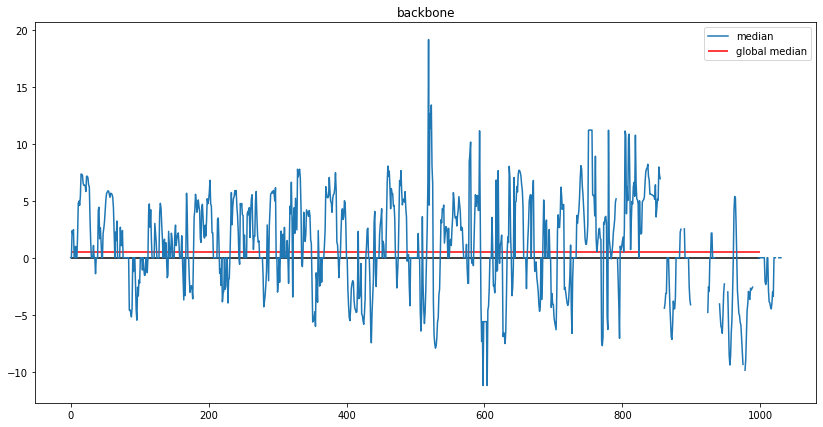

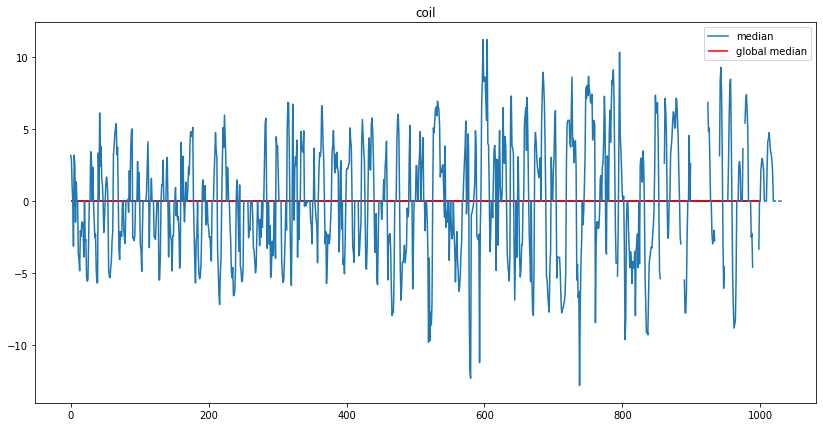

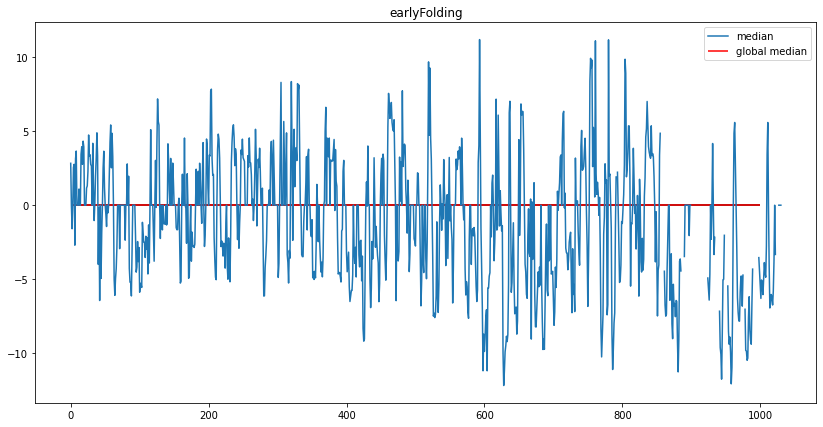

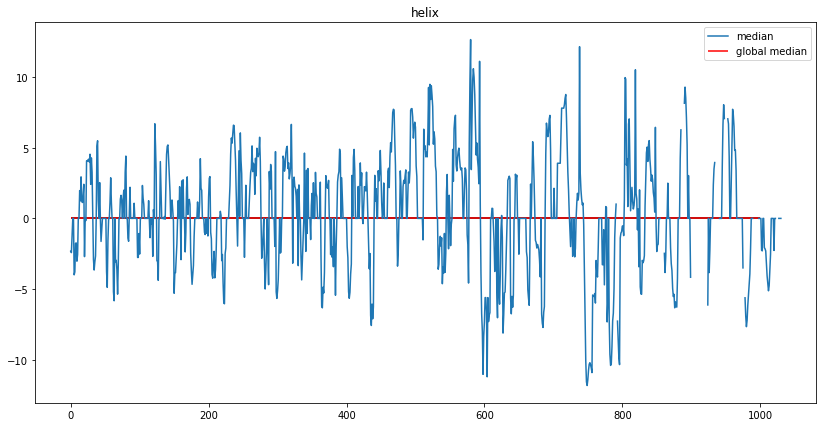

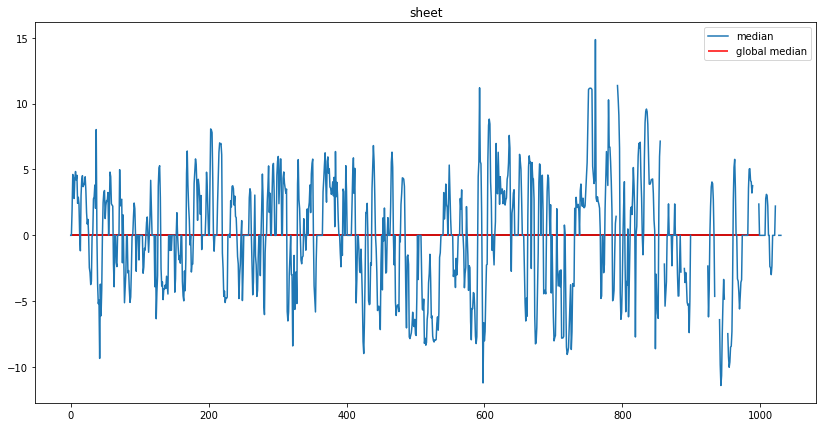

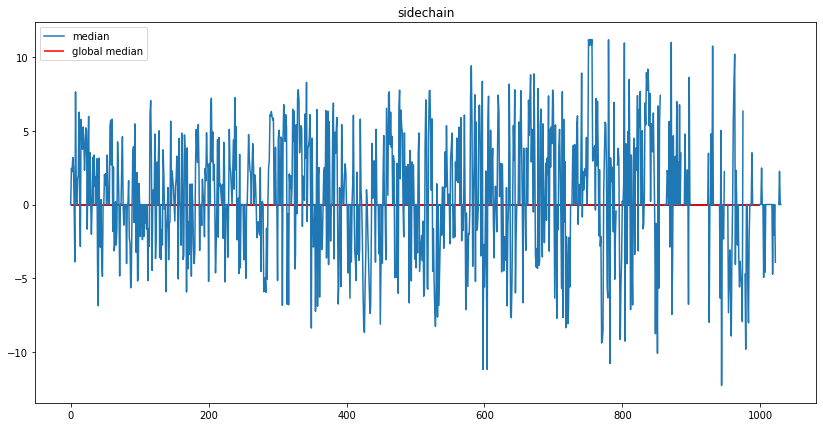

In [69]:
for FEATURE in FEATURES:
    plt.figure(figsize=(14,7))
    VALUES = WILCOXON_MEDIANS[FEATURE]
    plt.plot(WILCOXON_MEDIANS[FEATURE],label="median")
    plt.hlines(0,0,1000)
    MEDIAN_GLOBAL=np.nanmedian(VALUES)
    plt.hlines(MEDIAN_GLOBAL,0,1000, color="r",label="global median")
    plt.title(FEATURE)
    plt.legend()
    plt.xlim()
    plt.show()

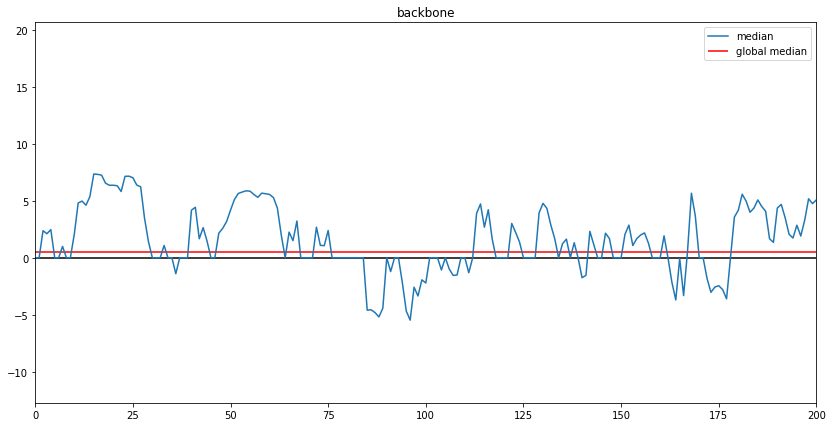

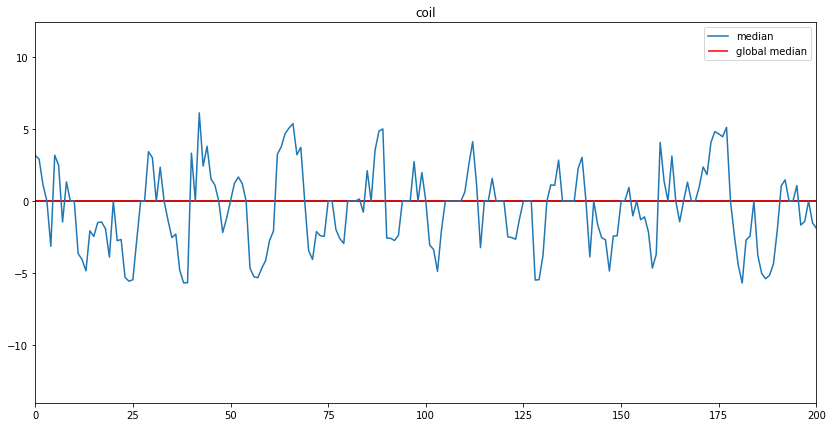

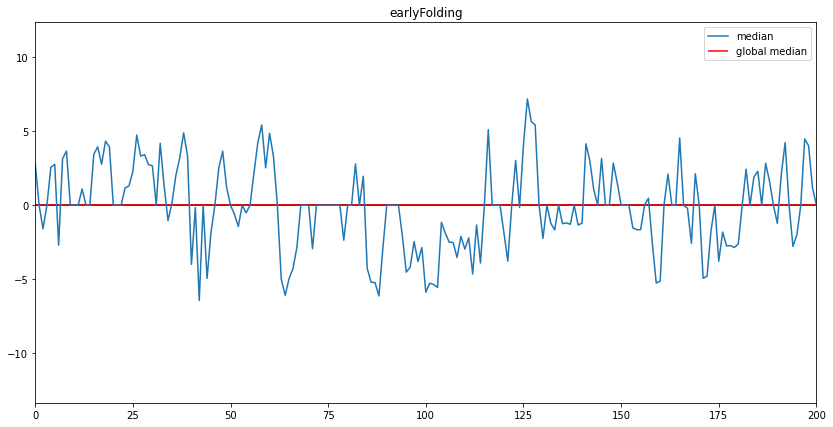

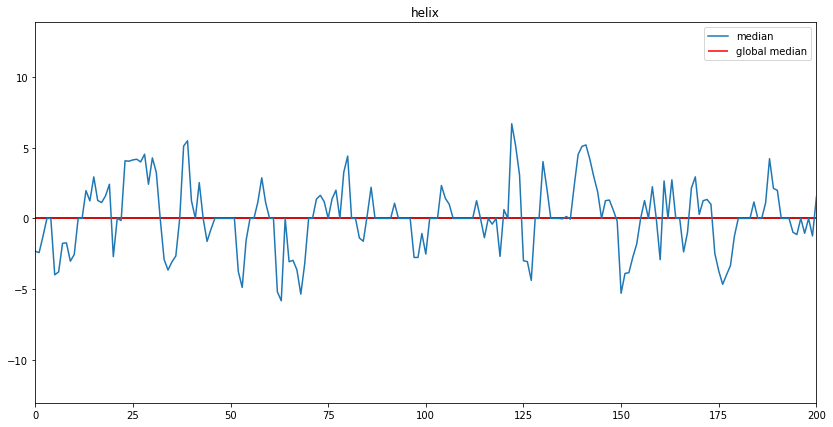

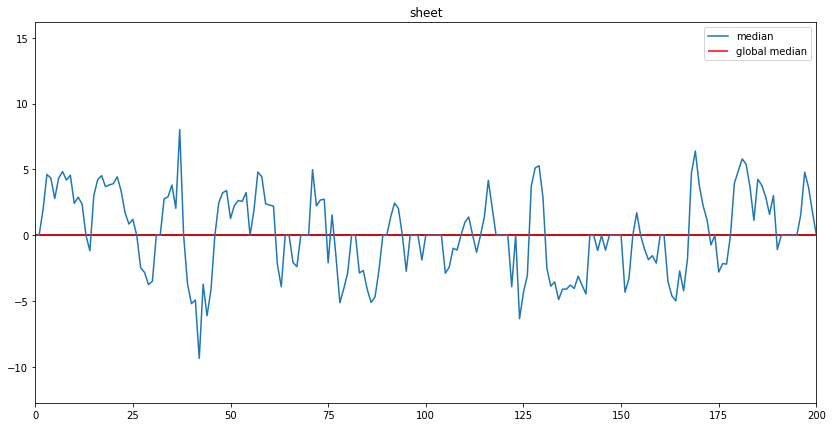

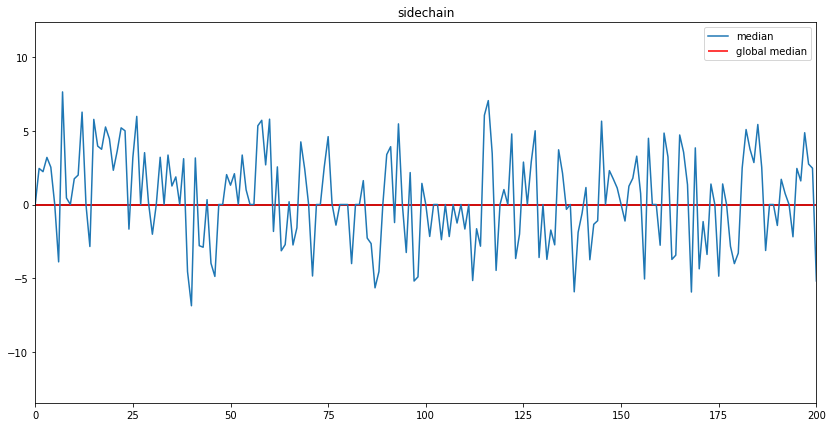

In [70]:
for FEATURE in FEATURES:
    plt.figure(figsize=(14,7))
    VALUES = WILCOXON_MEDIANS[FEATURE]
    plt.plot(WILCOXON_MEDIANS[FEATURE],label="median")
    plt.hlines(0,0,1000)
    MEDIAN_GLOBAL=np.nanmedian(VALUES)
    plt.hlines(MEDIAN_GLOBAL,0,1000, color="r",label="global median")
    plt.title(FEATURE)
    plt.legend()
    plt.xlim((0,200))
    plt.show()